<a href="https://colab.research.google.com/github/JohnDoll2023/CSE-432/blob/main/HW2_ProgrammingPart_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the instructions for HW 2 Programming Part.

# In this homework, you have three programming assigments

# The submission deadline is March 4th (next Friday) 23:59PM. Please submit the ipynb file to the canvas

The demos we used in the class can be found using the following link:

https://colab.research.google.com/drive/1ONTJ_L_4CMcyJcXdCeljRntazdW1zjW6?usp=sharing

https://colab.research.google.com/drive/1QI4v4_1bdeN5dJ_McV1Xn-RiavYvgymn?usp=sharing

# ===============================================

# Question 1: KNN in image classification

## [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist)

The following code downloads the MNIST dataset from the official website. Run this just once to get the "mnist.pkl" file. 

After you run this code, you can find the file in the "Files" option from the tool bar on the left 

<-

In [ ]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()
#    print ((load()[0]).shape)
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

if __name__ == '__main__':
    init()

Download complete.
Save complete.


## In the next part, please implement the KNN function for hand written digit recognition



**x_train** : 60,000x784 numpy array that each row contains flattened version of training images. 

**y_train** : 1x60,000 numpy array that each component is true label of the  corresponding training images. 

**x_test** : 10,000x784 numpy array that each row contains flattened version of
test images. 

**y_test** : 1x10,000 numpy array that each component is true label of the 
corresponding test images. 

**Notice**:  Once  you  get  “mnist.pkl”,  you  don't  need  to  call  init()  anymore. 
Everything you need to do is to locate “mnist.pkl” 
in your working directory and  to call load(). Then you can load  the MNIST 
database in your code (given below) 

**Notice**: Due to the high computational complexity of KNN, you do not need 
to  classify  all  10000  test  images.  Instead,  you  can  select  how  many  test 
images to classify in line51 and line52 of “knn.py” (e.g. 20 images). 

**Note**: Part of “knn.py” for data loading and plotting has been given. You can 
utilize them or write your own codes. You can choose the value of k. Also, 
choose L2 distance as the measurement metric. 

Accuracy result and execution time should be printed out and you can directly use the code provided in the following

In [ ]:
import math
import numpy as np  
import operator  
import time
import pickle


def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

# classify using kNN  
#x_train = np.load('../x_train.npy')
#y_train = np.load('../y_train.npy')
#x_test = np.load('../x_test.npy')
#y_test = np.load('../y_test.npy')
x_train, y_train, x_test, y_test = load()
# print(x_train.shape)
# print(y_train.shape)
# print(y_test[0:20])
# print(x_train[0:1])


def kNNClassify(newInput, dataSet, labels, k): 
    result=[]
    ########################
    # Input your code here #
    ########################
    
    #step 1: calculate Euclidean distance (L2)
    # there is one distance array for each point in the newInput set
    distances = []
    # the newPointArr holds each distance array in it
    newPointArr = []
    # the dimension variable signals how many different attributes we are 
    # comparing
    dimension = len(newInput[0])
    dist = 0
    # loop thru all points that need to be categorized
    for newPoint in newInput:
      distances = []
      # compare each point with each dataSet point we have
      for trainPoint in dataSet:
        dist = 0
        # calculate the distance at every attribute
        for i in range(dimension):
          dist += (int(newPoint[i]) - int(trainPoint[i])) ** 2
        # add that dist between newPoint[i] and dataSet point[j] to distances
        # array
        distances.append(dist)
      # once we are done looping thru our new point, add its distances array to
      # our list of arrays for each new point
      newPointArr.append(distances)

    #step 2: sort the distance 
    # this sorts the distance and a copy of the label set simulataneously so
    # that they are both in the same order
    for i in range(len(newPointArr)):
      list1 = newPointArr[i]
      list2 = y_train
      list1, list2 = zip(*sorted(zip(list1, list2)))
      newPointArr[i] = list2[0:k]

    #step 3: the max voted class will return 
    # for each column in our new point array, we map the values and find the max
    for col in newPointArr:
      occurrences = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
      max = 0
      maxKey = 0
      # for each label, update its frequency, then check to see if it has the
      # max number of occurrences and updates maxes if true
      for label in col:
        occurrences[label] = occurrences.get(label) + 1
        if occurrences.get(label) > max:
          max = occurrences.get(label)
          maxKey = label

      result.append(maxKey)
    
    ####################
    # End of your code #
    ####################
    return result

start_time = time.time()
outputlabels=kNNClassify(x_test[0:20],x_train,y_train,10)
result = y_test[0:20] - outputlabels
result = (1 - np.count_nonzero(result)/len(outputlabels))
print ("---classification accuracy for knn on mnist: %s ---" %result)
print ("---execution time: %s seconds ---" % (time.time() - start_time))

---classification accuracy for knn on mnist: 1.0 ---
---execution time: 720.0332243442535 seconds ---


# Question 2 [K-Means](https://colab.research.google.com/drive/1QI4v4_1bdeN5dJ_McV1Xn-RiavYvgymn?usp=sharing) (Required for graduate students) (Optional for undergraduate students without bonus)

The following code provide three functions which are DrawFun (plotting the data),getEuclidean (calculate the l2-distance between two data) and the k-means (implementation of the k-means algorithm). We also provde the data generation code in the next code block. 

## **Your job:**

The k-means function provided below will stop when it finished the number of iterations you set. However, for some dataset, the new center will not change after a few iterations. So, we should set the first criteria we mentioned in the slides. 

Please read the code for k-means function and modify it so that if, in the new iteration, the distances between each pair of the new centroids and the previous centroids are smaller than distance threshold (i.e.,"distanceTh"), the k-means algorithm should also stop. The "distanceTh" is provided in the testing code below. Please directly use this.

At each iteration, please print out the distances between each pair of the new centroids and the previous centroids and the threshold(i.e.,"distanceTh"). Please also print out the number of iterations when K-means algorithm stops.

In [ ]:
import math
import matplotlib.pyplot as plt
import random

#draw the function
def DrawFun(C,labels,Center):
  #C is the data, N x D x 2 : N represents the class C[0] is Dx2 which contains all the data belong to the first class.
  #D is all the data points (total number is unknown)
  #the center points for each cluster
  colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
  for i in range(len(C)):
      coo_X = []    
      coo_Y = []    
      for j in range(len(C[i])):
          coo_X.append(C[i][j][0])
          coo_Y.append(C[i][j][1])
      plt.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)
  Or_X=[]
  Or_Y=[]
  for item in Center:
    Or_X.append(item[0])
    Or_Y.append(item[1])
  plt.scatter(Or_X, Or_Y, marker='o', color='k', label=0)

  #plt.legend(loc='upper right')
  plt.show()
  print(labels)

 #l-2 distance
def getEuclidean(point1, point2):
    dimension = len(point1)
    dist = 0.0
    for i in range(dimension):
        dist += (point1[i] - point2[i]) ** 2
    return math.sqrt(dist)
 #k-means
  ########################
  # Modify the following code#
  ########################
def k_means(dataset, k, iteration,distanceTh):
    index = random.sample(list(range(len(dataset))), k)
    vectors = []
    for i in index:
        vectors.append(dataset[i])
    labels = []
    for i in range(len(dataset)):
        labels.append(-1)
    while(iteration > 0):
        C = []
        for i in range(k):
            C.append([])
        for labelIndex, item in enumerate(dataset):
            classIndex = -1
            minDist = 1e6
            for i, point in enumerate(vectors):
                dist = getEuclidean(item, point)
                if(dist < minDist):
                    classIndex = i
                    minDist = dist
            C[classIndex].append(item)
            labels[labelIndex] = classIndex
        for i, cluster in enumerate(C):
            clusterHeart = []
            dimension = len(dataset[0])
            for j in range(dimension):
                clusterHeart.append(0)
            for item in cluster:
                for j, coordinate in enumerate(item):
                    clusterHeart[j] += coordinate / len(cluster)
            vectors[i] = clusterHeart
        iteration -= 1
    return C, labels, index,vectors


Please use the following code to test your function.

In [ ]:
import math
import matplotlib.pyplot as plt
import random

data = """
1,0.697,0.46,2,0.774,0.376,3,0.634,0.264,4,0.608,0.318,5,0.556,0.215,
6,0.403,0.237,7,0.481,0.149,8,0.437,0.211,9,0.666,0.091,10,0.243,0.267,
11,0.245,0.057,12,0.343,0.099,13,0.639,0.161,14,0.657,0.198,15,0.36,0.37,
16,0.593,0.042,17,0.719,0.103,18,0.359,0.188,19,0.339,0.241,20,0.282,0.257,
21,0.748,0.232,22,0.714,0.346,23,0.483,0.312,24,0.478,0.437,25,0.525,0.369,
26,0.751,0.489,27,0.532,0.472,28,0.473,0.376,29,0.725,0.445,30,0.446,0.459"""
 

a = data.split(',')
dataset = [[float(a[i]), float(a[i+1])] for i in range(1, len(a)-1, 3)]
print(dataset)


Or_X=[]
Or_Y=[]
for item in dataset:
  Or_X.append(item[0])
  Or_Y.append(item[1])
plt.scatter(Or_X, Or_Y, marker='o', color='y', label=0)

StopDistance=0.0003
K=1000
C, labels, index,vectors = k_means(dataset, 3, K,StopDistance)
DrawFun(C,labels,vectors)


#print(index)
#print(vectors)


# Question 3: Linear regression

Please read the slides of chapter 3.2 and 3.3 and finish this assignment.

You can find the demo for the linear regression with code in the following link
https://colab.research.google.com/drive/1ONTJ_L_4CMcyJcXdCeljRntazdW1zjW6?usp=sharing

Please follow this example to finish this assignment.

## The new equation and new dataset
In this homework, you are given a new dataset. Please run the following code to check the data you got.


Based on the dataset, it seems that we should use a new equation (new model) to fit the data.

Let's use the following:

y=ϴ0*x^2+ϴ1*x+ϴ2

at first we set ϴ0=0, ϴ1=0, ϴ2=0

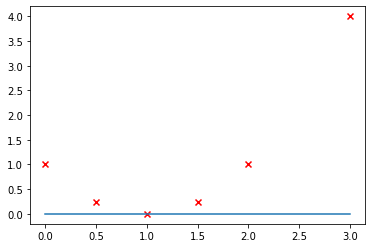

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x_GT = np.array([0, 0.5, 1, 1.5, 2, 3])
y_GT = np.array([1, 0.25, 0, 0.25, 1, 4])
plt.scatter(x_GT, y_GT,marker='x', color='r')
#plt.show()

Th0=0  #ϴ0
Th1=0   #ϴ1
Th2=0   #ϴ2
xpoints = np.linspace(0, 3, 100)
#y=theta0x+theta1 change this to y=ax2+bx+c
#Y_p=Th0*xpoints+Th1

#add your code here
a=0
b=0
c=0
Y_p=Th0*xpoints*xpoints+Th1*xpoints+Th2

plt.plot(xpoints, Y_p)
plt.show()

Based on the linear regression algorithm, you need first obtain the data and propose a model, which we have done in the above. Now we need to calculate the loss and use gradient descent to calculate the parameters: ϴ0, ϴ1, ϴ2

## Please design the gradient descent function for each step and the loss function by completing the following code

Please read the slides of chapter 3.2 and 3.3 to implement the code.

This function is just one step of the gradient descent. And this function will be called several time in the last code block, where we will run this function 6000 times in the "for" loop.

**Tips**: write down the equations for gradient decent first by following the slides of chapter 3.2 and 3.3

In [ ]:
def GradientDecent(Th0,Th1,Th2,x_GT,y_GT,Lr):
  
  ########################
  # Input your code here #
  ########################
    
   #formula from slide 37
   # need to figure out derivates
   #Th0 = Th0 - Lr*(deriv of Th0) * Loss
  sum1 = 0
  sum2 = 0
  sum3 = 0
  for i in range(len(x_GT)):
    sum1 += (2 * ((Th0 * (x_GT[i] ** 2)) + (Th1 * x_GT[i]) + Th2 - y_GT[i]) * x_GT[i] * x_GT[i])
    sum2 += (2 * ((Th0 * (x_GT[i] ** 2)) + (Th1 * x_GT[i]) + Th2 - y_GT[i]) * x_GT[i])
    sum3 += (2 * ((Th0 * (x_GT[i] ** 2)) + (Th1 * x_GT[i]) + Th2 - y_GT[i]))
  Th0 -= Lr * sum1
  Th1 -= Lr * sum2
  Th2 -= Lr * sum3



    
  ####################
  # End of your code #
  ####################
  return Th0,Th1,Th2
  
def LossValue(Th0,Th1,Th2,x_GT,y_GT):
  a=x_GT.shape[0]
  Loss=0
  ########################
  # Input your code here #
  ########################
  
  # put x in loss function, see how far from y
  for i in range(len(x_GT)):
    x = ((Th0 * (x_GT[i] ** 2)) + (Th1 * (x_GT[i])) + Th2)
    Loss += (x - y_GT[i]) ** 2
    
    
  ####################
  # End of your code #
  ####################
  return Loss

## The following is the iterations of the entire gradient descent. 

Please run the following code to test your code.

In the following code, you will run the gradient descent 6000 times to calculate the ϴ0, ϴ1, ϴ2. The learning rate is set as 0.0005.

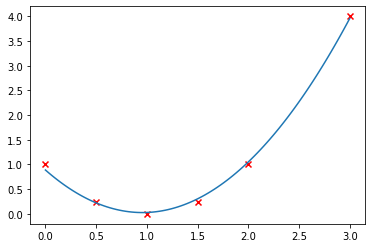

0.02157623835671022 0.9412096176581113 -1.800503759391267 0.8884775869518914


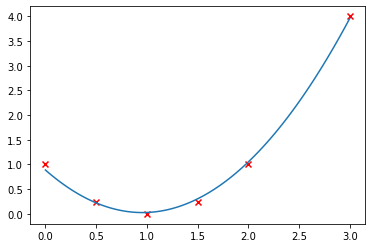

0.02155952352111863 0.9412323941483673 -1.8005810479544215 0.8885207928139514


In [ ]:
Lr=0.0005 #  
Iteration=6000
for i in range(Iteration):
  
  Th0,Th1,Th2=GradientDecent(Th0,Th1,Th2,x_GT,y_GT,Lr)
  if i<Iteration-2:
    continue
  plt.scatter(x_GT, y_GT,marker='x', color='r')
  Y_p=Th0*xpoints*xpoints+Th1*xpoints+Th2
  plt.plot(xpoints, Y_p)
  plt.show()
  L=LossValue(Th0,Th1,Th2,x_GT,y_GT)
  print(L,Th0,Th1,Th2)